In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# The Case Study

## UFood Data Analyst Case

UFood is the lead food delivery app in Brazil, present in over a thousand cities.

Keeping a high customer engagement is key for growing and consolidating the company’s position as the market leader.

Data Analysts working within the data team are constantly challenged to provide insights and value to the company through open-scope projects. This case intends to simulate that.

In this case, you are presented with a sample dataset that mocks meta-information on the customer and on UFood campaign interactions with that customer.

It is your challenge to understand the data, find business opportunities & insights, and propose any data-driven action to optimize the campaigns' results & generate value to the company.

You should consider that you have to present your results to both technical and business stakeholders.

### Key Objectives are:

1. Explore the data – don’t just plot means and counts. Provide insights, define cause and effect. Provide a better understanding of the characteristic features of respondents.
2. Propose and describe a customer segmentation based on customer behaviors.
3. Visualize data and provide written reasoning behind discoveries.

## The Company

Consider a well-established company operating in the retail food sector. Presently, they have several hundred thousand registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish, and sweet products. These can further be divided into gold and regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs, and the company’s website. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising. For this reason, several strategic initiatives are being considered to reverse this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.

## The Marketing Department

The marketing department was pressured to spend its annual budget more wisely. The success of these activities should ideally prove the value of the approach and convince the more .  keptical within the company.
skeptical within the company.

In [83]:
food = pd.read_csv(r"C:\Users\jackw\OneDrive\Documents\Data\Analyst Builder\Pandas for Data Analysis\Real-World Projects\Food Marketing Project\u_food_marketing.csv")

In [85]:
pd.set_option('display.max.columns', 40)
pd.set_option('display.max.rows', 2500)

In [87]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


### Looking for duplicates

In [89]:
food[food.duplicated()].count()

Income                  184
Kidhome                 184
Teenhome                184
Recency                 184
MntWines                184
MntFruits               184
MntMeatProducts         184
MntFishProducts         184
MntSweetProducts        184
MntGoldProds            184
NumDealsPurchases       184
NumWebPurchases         184
NumCatalogPurchases     184
NumStorePurchases       184
NumWebVisitsMonth       184
AcceptedCmp3            184
AcceptedCmp4            184
AcceptedCmp5            184
AcceptedCmp1            184
AcceptedCmp2            184
Complain                184
Z_CostContact           184
Z_Revenue               184
Response                184
Age                     184
Customer_Days           184
marital_Divorced        184
marital_Married         184
marital_Single          184
marital_Together        184
marital_Widow           184
education_2n Cycle      184
education_Basic         184
education_Graduation    184
education_Master        184
education_PhD       

In [91]:
food.drop_duplicates(keep = False, inplace = True)

In [93]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

As a lot of this data is quite standardised, stored as int64, there isn't much transformation that needs to be done.  
The cleaning will mostly come from trimming down the bloat in joining columns.

### Combining Kidhome and Teenhome

In [95]:
food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis=1)

In [97]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


### Combining marital status columns:

In [99]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1, 0:0})

In [101]:
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis=1)

In [103]:
food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4


In [91]:
# Renaming Marital_Status data appropriately

In [105]:
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [107]:
food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married


### Doing the same thing for education level:

In [109]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married


In [111]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})

In [113]:
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis=1)

In [115]:
food[food['Education_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5


In [215]:
food['Education_Status_str'] = food['Education_Status'].map({5: 'PhD', 4: 'Master', 3: 'Graduation', 2: 'Basic', 1: '2nCycle'})

In [217]:
food[food['Education_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0,31 - 40


### Cleaning the "Accepted Campaigns" columns:

In [121]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis=1)

In [123]:
food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,...,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,PhD,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,...,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,PhD,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,...,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,Master,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,...,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,PhD,1


## Investigating Correlations in the Data:

### Starting with Accepted Campaigns

In [125]:
food.corr(numeric_only = True, method = 'pearson')['Accepted_Campaigns'].sort_values(ascending = False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.929510
Response                0.723803
AcceptedCmp5            0.667235
AcceptedCmp1            0.642555
AcceptedCmp4            0.521582
MntWines                0.469328
MntTotal                0.448238
MntRegularProds         0.445782
AcceptedCmp3            0.428455
AcceptedCmp2            0.417459
NumCatalogPurchases     0.369332
Income                  0.362983
MntMeatProducts         0.342145
MntGoldProds            0.216369
NumWebPurchases         0.212023
MntSweetProducts        0.197284
MntFruits               0.183129
NumStorePurchases       0.175258
MntFishProducts         0.159916
Customer_Days           0.063671
Education_Status        0.057018
marital_Single          0.050920
education_PhD           0.050116
marital_Widow           0.044388
marital_Divorced        0.003913
education_Master        0.000125
education_Graduation   -0.009974
Marital_Status         -0.010402
Complain               -0.014301
education_

In [129]:
# Just realising AcceptedCmpOverall already exists :(

In [139]:
# We can repurpose the Accepted_Campaigns column to whether they accepted a campaign or not, boolean value

In [127]:
food['Accepted_Campaigns']= (food['Accepted_Campaigns'] != 0).astype(int)

In [129]:
food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,...,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,PhD,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,...,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,PhD,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,...,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,Master,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,...,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,PhD,1


In [131]:
food.corr(numeric_only = True, method = 'pearson')['Accepted_Campaigns'].sort_values(ascending = False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
Education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Marital_Status         -0.021551
marital_To

In [149]:
# Filtering down the correlations to find more statistically significant data.
# Correlation of 0.3+ as a baseline

<Axes: >

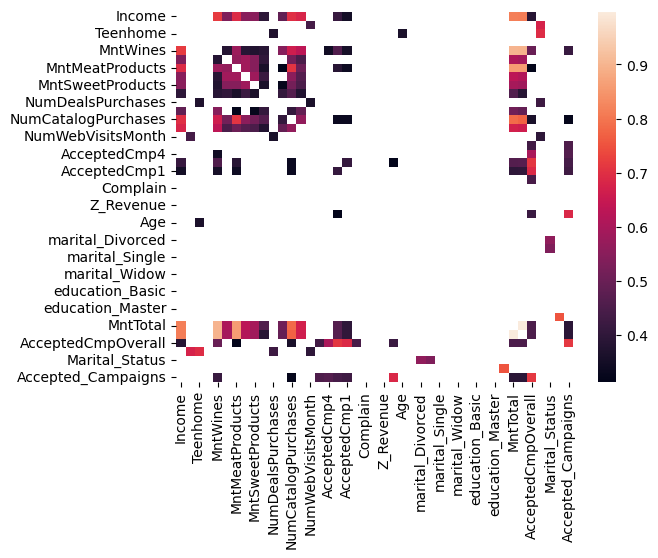

In [133]:
all_correlations = food.corr(method = 'pearson', numeric_only = True)
all_correlations = all_correlations[(all_correlations >= 0.3) & (all_correlations < 1)]

sns.heatmap(all_correlations)

In [135]:
all_correlations['Accepted_Campaigns']

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

## Investigating correlation between age and customer spending habits

In [137]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0


In [164]:
# First we need to bucket the age groups.

In [139]:
age_groups = [(21,30), (31,40), (41,50), (51,60), (61,70), (71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)

### Visualising based on Age_Groups

<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

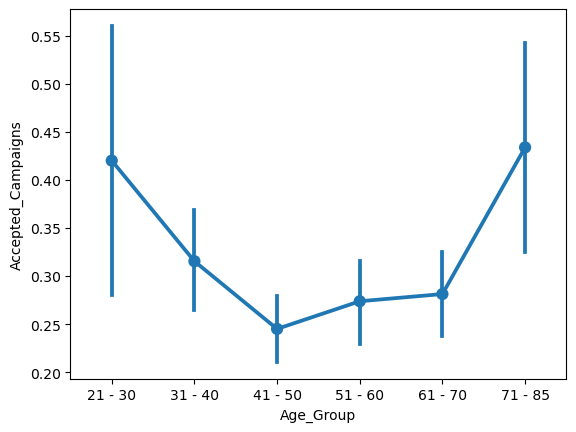

In [141]:
age_order = ['21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']

sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

### Confidence intervals seem very low on the poles of the age ranges

In [143]:
food['Age_Group'].value_counts()

Age_Group
41 - 50    612
51 - 60    409
61 - 70    391
31 - 40    298
71 - 85     83
21 - 30     50
Name: count, dtype: int64

### We can use percentages instead to better understand the data

In [145]:
counts = food['Age_Group'].value_counts()

In [147]:
percentage = counts /food.shape[0]
percentage

Age_Group
41 - 50    0.332067
51 - 60    0.221921
61 - 70    0.212154
31 - 40    0.161693
71 - 85    0.045035
21 - 30    0.027130
Name: count, dtype: float64

In [149]:
percent_food = percentage.reset_index()

In [151]:
percent_food.columns = ['age_group','percentage']

In [153]:
percent_food = percent_food.sort_values('age_group')
percent_food

,age_group,percentage
5,21 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


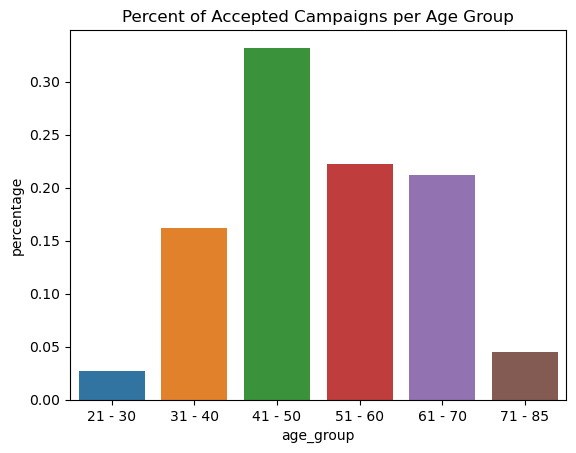

In [155]:
sns.barplot(x= 'age_group', y = 'percentage', data = percent_food,)
plt.title('Percent of Accepted Campaigns per Age Group')
plt.show()

### Changing our data to reflect percentage of accepted campaigns has essentially flipped the data visualisation.

Based off of this data, our core target audience for future campaigns should by the 31-70 age groups.  
We need to drill down further into the data to assess other factors, such as total spending and customer retention.

In [241]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0,31 - 40


In [233]:
# We can groupby Age_Group and see the MntTotal (total spend).

In [157]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

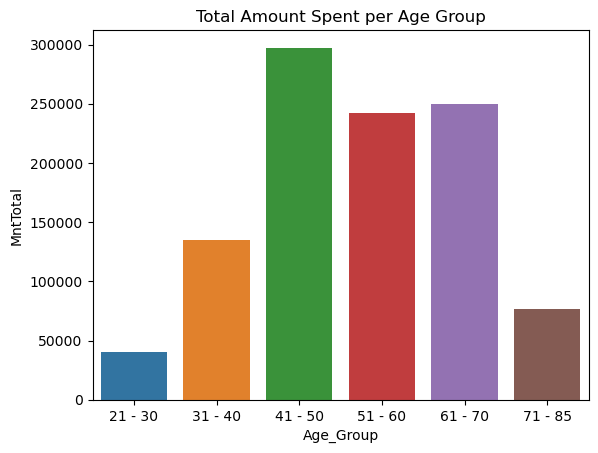

In [159]:
sns.barplot(x= 'Age_Group', y = 'MntTotal', data = grouped_food,)
plt.title('Total Amount Spent per Age Group')
plt.show()

We can provide recommendations based on this data in two ways;  
  
1. We can say our biggest spenders are in the 41-70 age range, therefore we should target these age groups.

2. Or we could say the poles of our age ranges are not spending much money, and so we should target these as there is the most room for growth. 

In [246]:
# Filtering for when the customer has accepted a campaign.

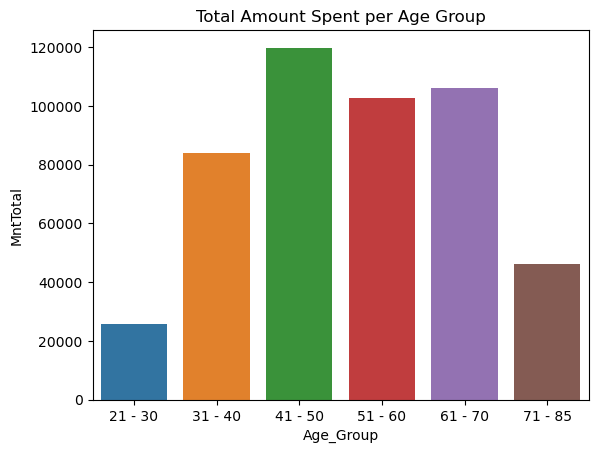

In [161]:
accpt_cap = food[food['Accepted_Campaigns'] != 0]

grouped_food = accpt_cap.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x= 'Age_Group', y = 'MntTotal', data = grouped_food,)
plt.title('Total Amount Spent per Age Group')
plt.show()

### Breaking out the data based on purchase method

In [62]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [163]:
food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()

NumWebPurchases         7619
NumCatalogPurchases     4871
NumStorePurchases      10675
dtype: int64

In [165]:
sum_food = pd.DataFrame(food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sum'])

In [167]:
sum_food = sum_food.reset_index()
sum_food

,index,Sum
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


In [169]:
sum_food.rename(columns={'index': 'Purchase_Type', 'Sum': 'Sum'}, inplace=True)

In [72]:
sum_food

,Purchase_Type,Sum
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<Axes: xlabel='Purchase_Type', ylabel='Sum'>

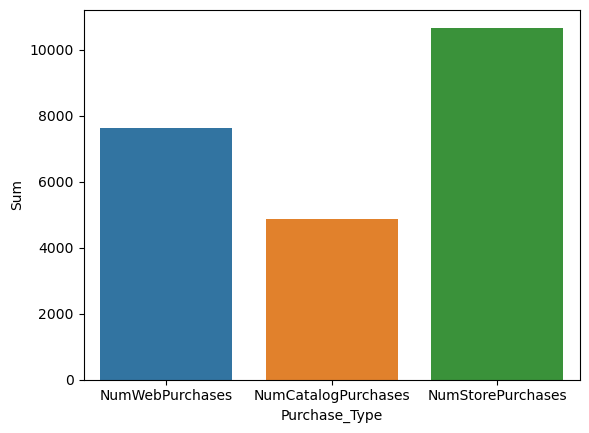

In [171]:
sns.barplot(x= 'Purchase_Type', y = 'Sum', data = sum_food)

### Comparison between purchase method before and after accepting campaign

<Axes: xlabel='Purchase_Type', ylabel='Sum'>

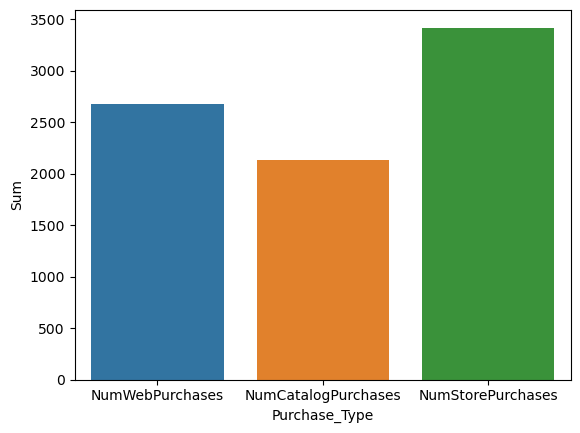

In [173]:
accpt_camp = food[food['Accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(accpt_camp[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sum'])
sum_food = sum_food.reset_index()
sum_food.rename(columns={'index': 'Purchase_Type', 'Sum': 'Sum'}, inplace=True)
sns.barplot(x= 'Purchase_Type', y = 'Sum', data = sum_food)

### Digging into distriubtions 

C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

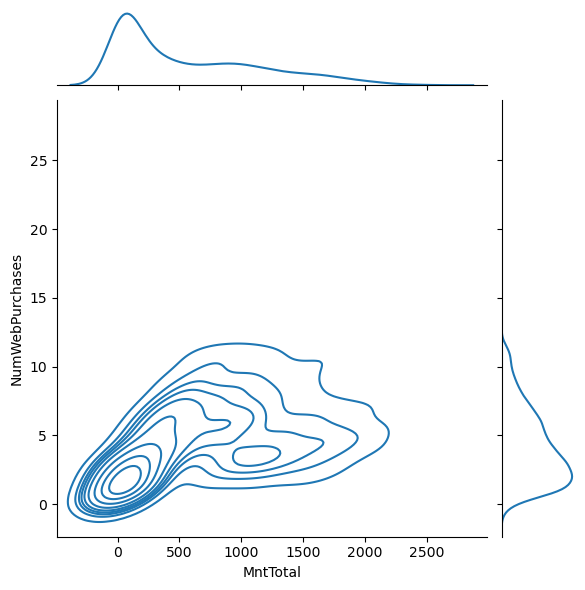

In [180]:
sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')

C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

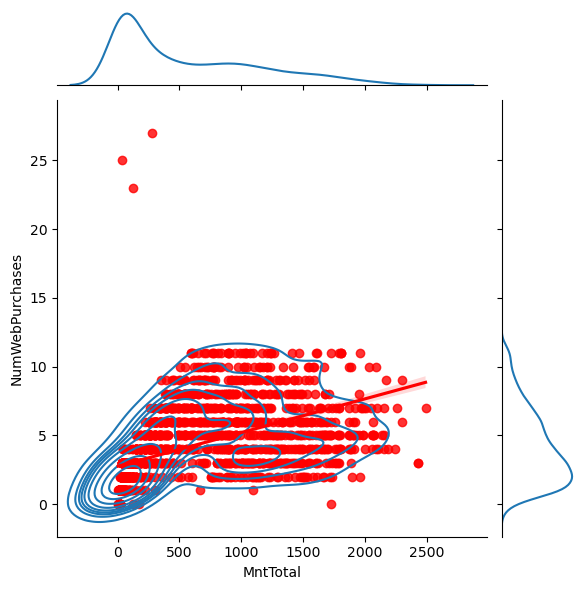

In [184]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

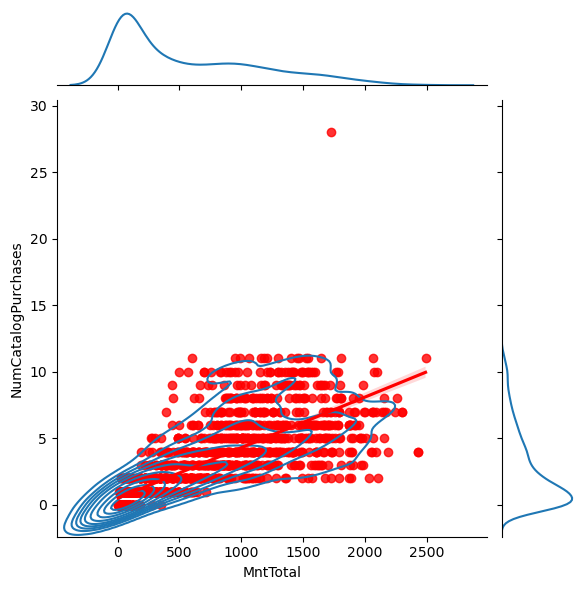

In [186]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jackw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

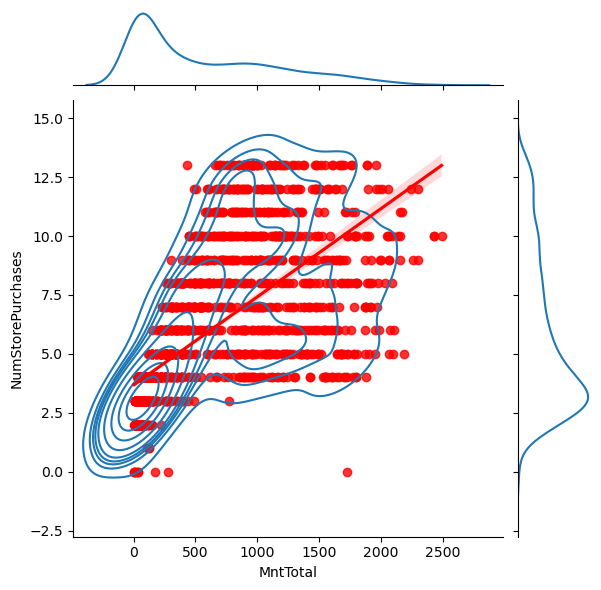

In [190]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

Again we have multiple angles we can approach this from.

Do we want to boost the number of purchases made through catalogues.

Or focus on the in-store/web purchases where there is more traffic?

## Investigating number of children at home effect on purchasing:

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

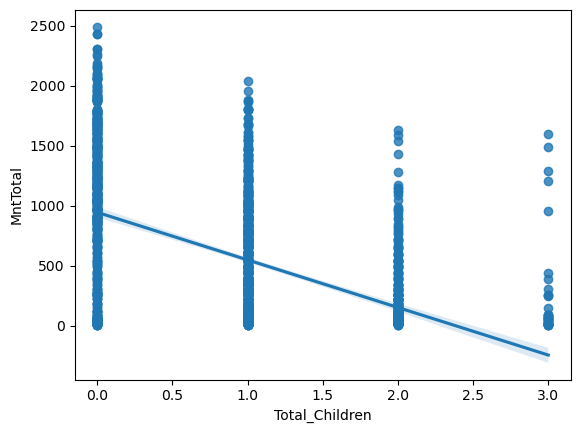

In [194]:
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

At a first glance is seems as though people who have fewer children are spending significantly more money.

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

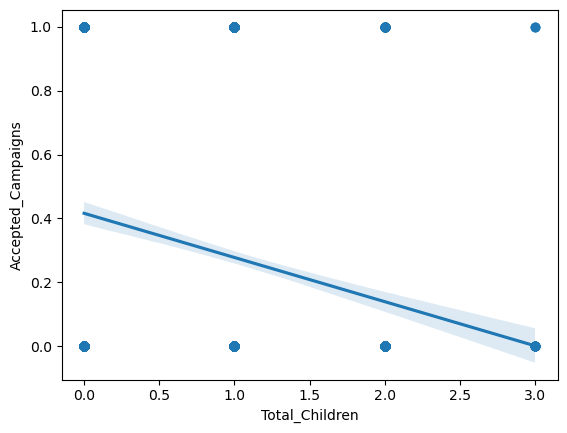

In [197]:
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

Customers are also more likely to accept a camaign if they have fewer childrne.

## Looking at Education Status

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

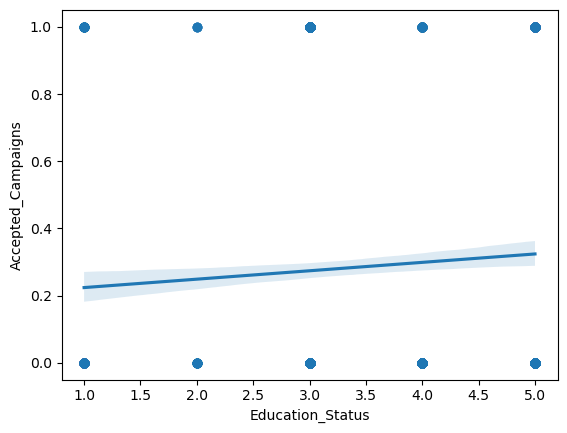

In [221]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

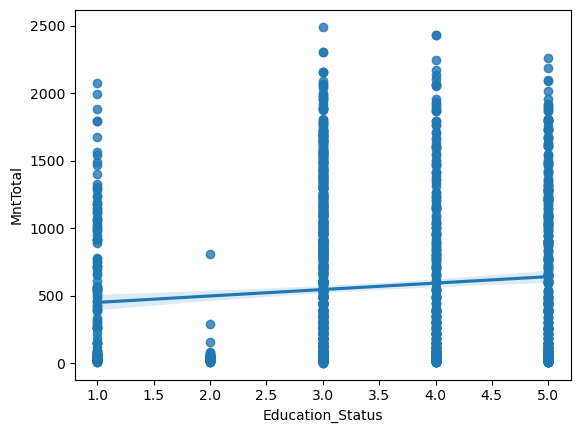

In [223]:
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)

There seems to be a slightly positive correlation between higher education level and higher spending.
Not statistically significatly.

## Looking at Marital Status

In [230]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0,31 - 40


<Axes: xlabel='Marital_Status_str', ylabel='count'>

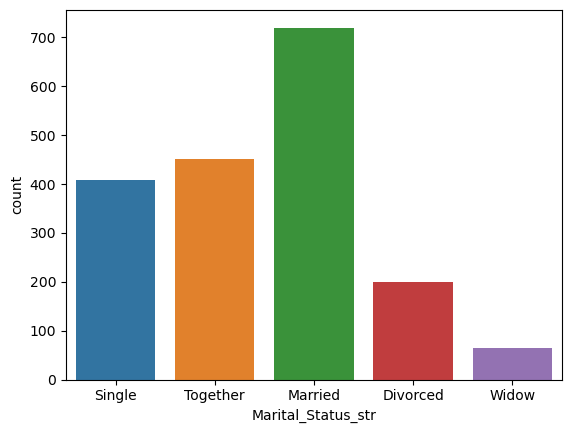

In [232]:
sns.countplot(x = 'Marital_Status_str', data = food)

<Axes: xlabel='Marital_Status', ylabel='MntTotal'>

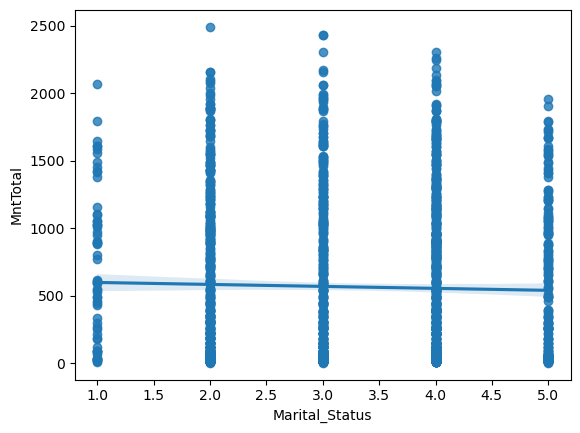

In [246]:
sns.regplot(x='Marital_Status', y='MntTotal', data=food)

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

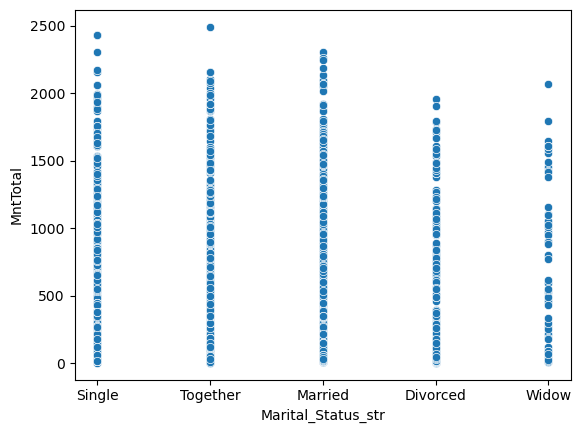

In [248]:
sns.scatterplot(x = 'Marital_Status_str', y = 'MntTotal', data = food)

<Axes: xlabel='Marital_Status', ylabel='Accepted_Campaigns'>

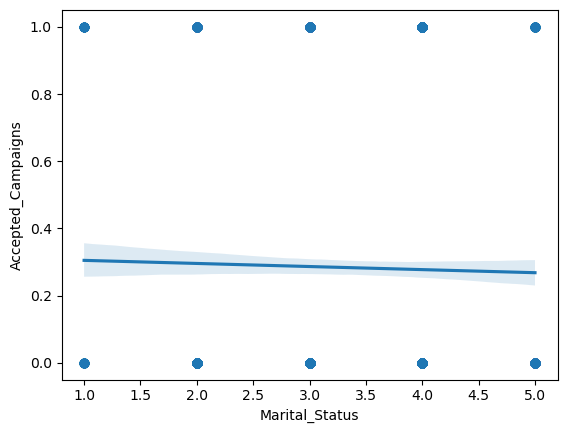

In [250]:
sns.regplot(x='Marital_Status', y='Accepted_Campaigns', data=food)

It is worth noting that the vast majority of the customer base are either Married or Together, however it does not appear  
to have any statistically significant impact on their purchasing patterns.

In [253]:
# Double checking this idea by grouping the data:

In [275]:
accpt = food[food['Accepted_Campaigns'] != 0]

rel_food = accpt.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

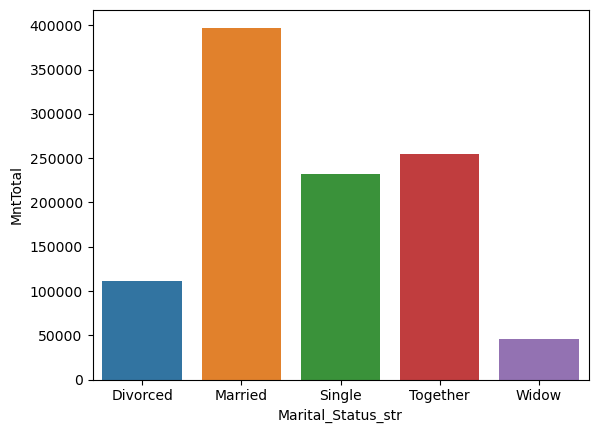

In [263]:
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food)

On further investigation Married people are spending at a higher rate than other relationship types,  
we need to see whether this is true proportionally.

In [280]:
# Comparison to those who accepted campaigns:

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

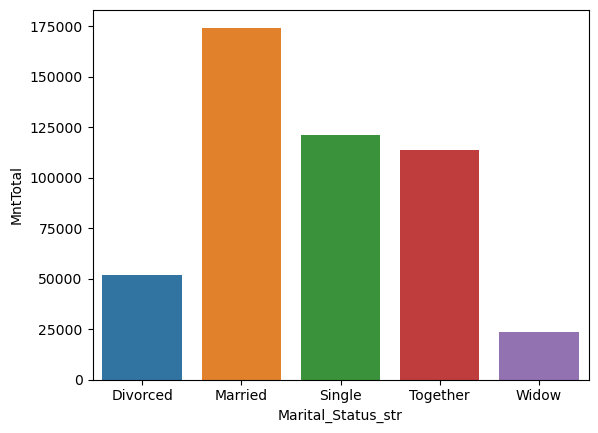

In [278]:
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food)

In [292]:
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_str'].value_counts()

total = food['Marital_Status_str'].value_counts()

In [296]:
percent_marital = accepted / total * 100

In [298]:
percent_marital

Marital_Status_str
Divorced    28.643216
Married     26.111111
Single      32.762836
Together    26.607539
Widow       37.500000
Name: count, dtype: float64

In [302]:
percent_marital.reset_index()

,Marital_Status_str,count
0,Divorced,28.643216
1,Married,26.111111
2,Single,32.762836
3,Together,26.607539
4,Widow,37.500000


In [304]:
percent_food = percent_marital.reset_index()
percent_food.columns = ['Marital_Status', 'Percentage']

<Axes: xlabel='Marital_Status', ylabel='Percentage'>

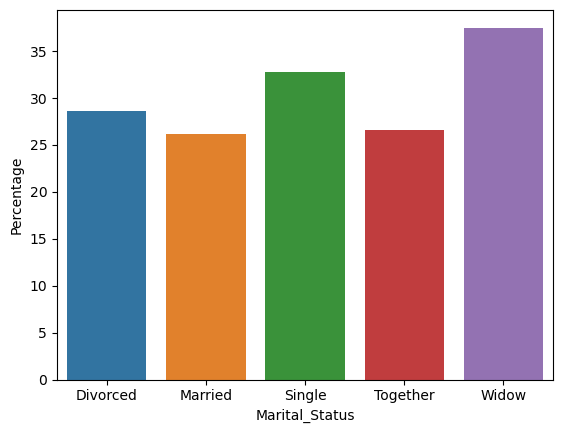

In [306]:
sns.barplot(x = 'Marital_Status', y = 'Percentage', data = percent_food)

# Initial Overall Findings:  

### 1. Age ranges of 30-70 spend more money, but are overall less likely to accept marketing campaigns.  
  
### 2. Catalogue purchasers were more likely to accept campaigns, however they spend MORE during in-store purchases. Therefore it is recommended to split the targeted campaigns between all groups, with a slightly higher focus on catalogue.  

### 3. We found a very high correlation between having fewer children and higher spending. Recommended to heavily focus marketing on customers with fewer - no children.  

### 4. There seemed to be no correlation between education and spending habits. Not recommended to focus campaings here.  

### 5. There doesn't seem to be a clear correlation between marital status and spending. Married and Together groups make up the majority of the customer base, and therefore they spend more. Widows seems to accept a higher percentage of campaigns.